# Basit doğrusal regresyon
**y=ax+b**
y --bağımlı değişken
x --bağımsız değişlken
a --bağımsız değişkenin kat sayısı
b --sabit


In [27]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [28]:
df=pd.read_csv("student.csv")

In [29]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [30]:
y=df[["Marks"]]  # tahmin etmek istediğim şey
x=df[["number_courses","time_study"]]
# elimdeki veriler


In [31]:
df.info()  # veri hakkında bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [32]:
# sklearn.linear_model.LinearRegression()  ---eğer yukarda çağırma yapılmazsa böylede yazılır

l=LinearRegression()
model=l.fit(x,y)  # fit öğrenme

In [33]:
model.predict([[4,4]])   # tahin etmek
# 4. sınıf günlük 4 saat çalırsam kaç alırım

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.59657189]])

In [34]:
model.score(x,y)  # ne kadar oranda tahmin ediliyor

0.9403656320238896

In [35]:
df.columns=["sinif","saat","puan"]

In [36]:
df.head()

,sinif,saat,puan
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [37]:
#   y=mx+b

lm=LinearRegression()  #  liner modelini çağırdık
model2=lm.fit(x,y)  # öğrenme
model.coef_   # katsayı m

array([[1.86405074, 5.39917879]])

In [38]:
model.intercept_  # sabit b

array([-7.45634623])

In [39]:
model.predict([[4,5]])  # tahmin
# 4. sınıf 5 er saat çalışan biri kaç puan alır

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[26.99575068]])

In [40]:
# sağlamasını yapmak
(4*1.86405074)+(5*5.39917879)+(-7.45634623)

26.99575068

In [41]:
df.head(3)

,sinif,saat,puan
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811


In [42]:
# hatayı bulmak
s1=model2.predict([[3,4.508]])[0][0] # dizinin içindeki elamanı almka için kullandık[0][0]
s1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.475303970942413

In [43]:
# hata değerini bulmak
(19.202-s1)/19.202

-0.17046682485899442

In [44]:
model.score(x,y)#  doğruluk oranı

0.9403656320238896

<function matplotlib.pyplot.show(close=None, block=None)>

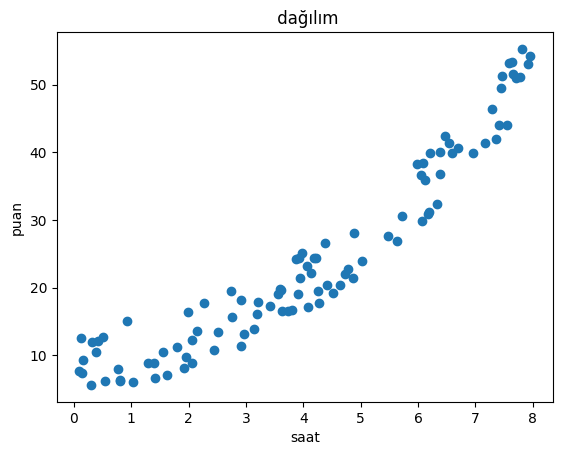

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df.saat,df.puan)
plt.title(" dağılım")
plt.xlabel("saat")
plt.ylabel("puan")
plt.show

In [46]:
import statsmodels.api as sm
x=df.puan
y_gercek=df.saat
x=sm.add_constant(x)
model=sm.OLS(y_gercek,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   saat   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.36e-48
Time:                        12:53:15   Log-Likelihood:                -118.41
No. Observations:                 100   AIC:                             240.8
Df Residuals:                      98   BIC:                             246.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2663      0.158      1.681      0.0

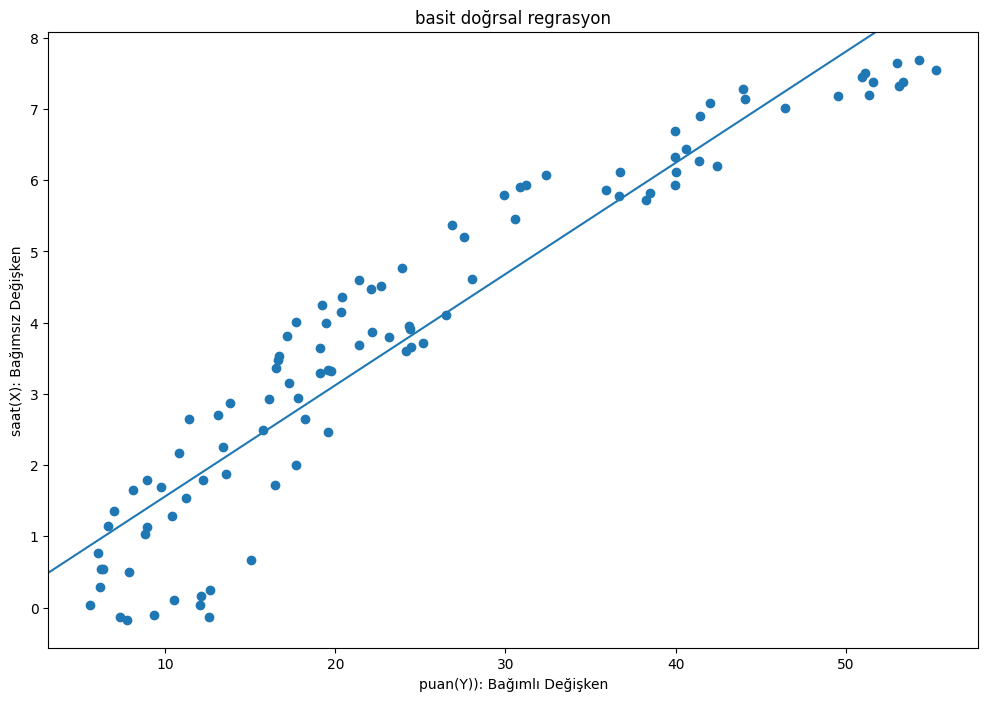

In [47]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.plot_ccpr(model,"puan",ax=ax)
plt.title("basit doğrsal regrasyon")
plt.xlabel("puan(Y)): Bağımlı Değişken")
plt.ylabel("saat(X): Bağımsız Değişken")
plt.show()

# preprocessing ve dummy
makine öğrenmesi yapabilmek için tün sütun değerlerini numeric olmalıdır

In [48]:
df=pd.read_csv("/content/Audi_A1_listings.csv")
df.head()

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642
3,11,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0,https://www.autotrader.co.uk/car-details/20221...,3745.000000,41,449,83,573
4,12,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0,https://www.autotrader.co.uk/car-details/20220...,3700.000000,12,452,85,549


In [49]:
# fiyat belirlerken fiyatı etkileyemeyecek değerler çıkarılır
# href etkilemez,index etkilemez
# kullanılmayacak sütunları atmak
df=df.drop(columns=["index","href","MileageRank","PriceRank","PPYRank","Score","PPY"])

In [50]:
df.head()

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£)
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0
3,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0
4,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0


In [51]:
# kategorisel veriler numerik verilere çevirmek gerekir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 33.2+ KB


In [52]:
df.columns=["yil","kasa","mil","motor","ps","vites","yakit","sahip","fiyat"]
df.head()

,yil,kasa,mil,motor,ps,vites,yakit,sahip,fiyat
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0
3,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0
4,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0


In [53]:
# motor kategorisi sonunda L leri boşlukla değiştir
df["motor"]=df["motor"].str.replace("L","")
print(df["motor"])
# numeric değere çevirme
df["motor"]=pd.to_numeric(df["motor"])
print(df["motor"])

0      1.6
1      1.0
2      1.4
3      1.6
4      1.6
      ... 
466    1.4
467    1.0
468    1.4
469    1.0
470    1.0
Name: motor, Length: 471, dtype: object
0      1.6
1      1.0
2      1.4
3      1.6
4      1.6
      ... 
466    1.4
467    1.0
468    1.4
469    1.0
470    1.0
Name: motor, Length: 471, dtype: float64


In [54]:
df.head()

,yil,kasa,mil,motor,ps,vites,yakit,sahip,fiyat
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0
3,2014.0,Hatchback,86000.0,1.6,103.550296,Manual,Diesel,3,7490.0
4,2014.0,Hatchback,104310.0,1.6,103.550296,Manual,Diesel,3,7400.0


In [55]:
# sütun içindeki değerleri dummy et yani sayıya çevir
df=pd.get_dummies(df,columns=["kasa","vites","yakit"])# her iki durumuda getiriyor sadece bir tanesini getrmek için ,drop_first=True ekle
df=df.drop(columns=["vites_Automatic","yakit_Diesel"])
df.head()

,yil,mil,motor,ps,sahip,fiyat,kasa_Hatchback,vites_Manual,yakit_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,1,1,0
1,2016.0,42596.0,1.0,93.688363,3,10755.0,1,1,1
2,2015.0,42700.0,1.4,123.274162,2,10799.0,1,1,1
3,2014.0,86000.0,1.6,103.550296,3,7490.0,1,1,0
4,2014.0,104310.0,1.6,103.550296,3,7400.0,1,1,0


In [56]:
y=df[["fiyat"]]
x=df.drop("fiyat",axis=1) # fiyat hariç hepsi
# axis sütunlardan fiyatı sil demek


In [57]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(x,y) # öğrenme

In [58]:
# tahmin etmek
model.predict([[2017,30000,1.6,110,1,1,2600,0]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-4982670.238512175

In [59]:
model.score(x,y)  # tahmin etme oranı

0.9110559159967564